# Final for Exploratory Data Analysis for Machine Learning

## Exploratory Data Analysis with Superstore dataset

### Srilathaa Vasu

#### 15.02.2021

## I. Dataset description :

I am using SampleSuperstore dataset for performing EDA. I have taken this dataset from Kaggle. This dataset contains 9994 observations and 13 variables related to a superstore.

### 1. Importing libraries

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load data

In [3]:
#loading dataset
data = pd.read_csv('SampleSuperstore.csv')

data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 13)

In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## II. Data Exploration Plan :

I am going to select a few variables that are noteworthy and compare relationships between them.

In [7]:
data.dtypes.value_counts()

object     8
float64    3
int64      2
dtype: int64

In [8]:
#count of missing values by variable is shown below
data_na = data.isna().sum().to_frame().sort_values(by = 0, axis = 0)

data_na.rename(columns={0: 'NA Count'}, inplace=True)

data_na[data_na['NA Count'] == 0].index


Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

## III. Data Cleaning :

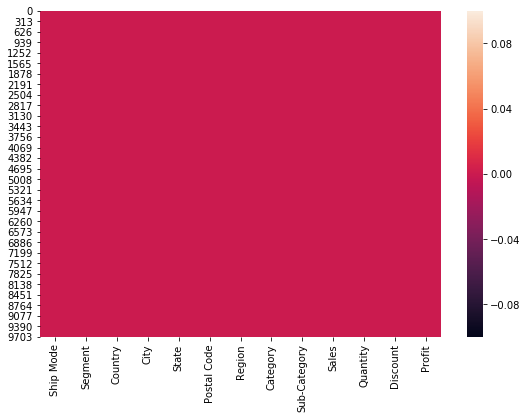

In [9]:
#Check whether null values are present or not 
fig = plt.figure(figsize=(9,6))
sns.heatmap(data.isnull())

In [10]:
#We can also check by using .isna() or .isnull() method
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Here you can observe that there is no null values present in this data set.

## IV. Key Findings :


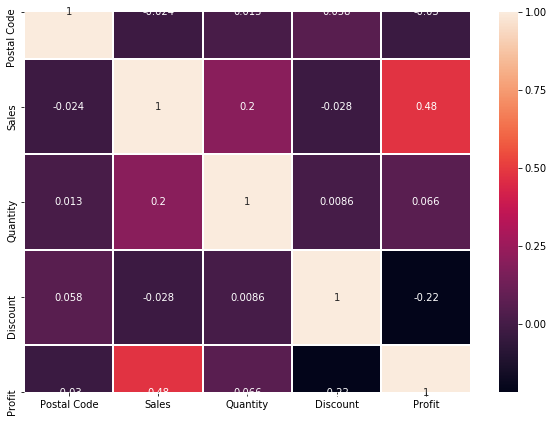

In [13]:
#Correlation plot
fig =plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),linewidths=1,annot=True)

In [11]:
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
South Carolina            42
Louisiana                 42
Nevada        

### Exploration 1

In [20]:
def getUnique(data,  target_variable, sort_by, color, threshold_categories = 10):
    
    total_cols = [i for i in data.columns.values if len(data[i].unique()) < threshold_categories and len(data[i].unique()) > 1]
    
    fig = plt.figure(figsize = (20,20))
    rows = len(total_cols) // 2
    cols = len(total_cols) // 2
    
    for i, num in zip(total_cols, range(1,len(total_cols)+1)):
        ax = fig.add_subplot(rows,cols,num)
        data.groupby(i)[target_variable].sum().sort_values(by = sort_by, ascending = False).plot(kind = 'bar', ax = ax, title = i, color = color)

    plt.tight_layout(pad = 3.0)
    plt.show()

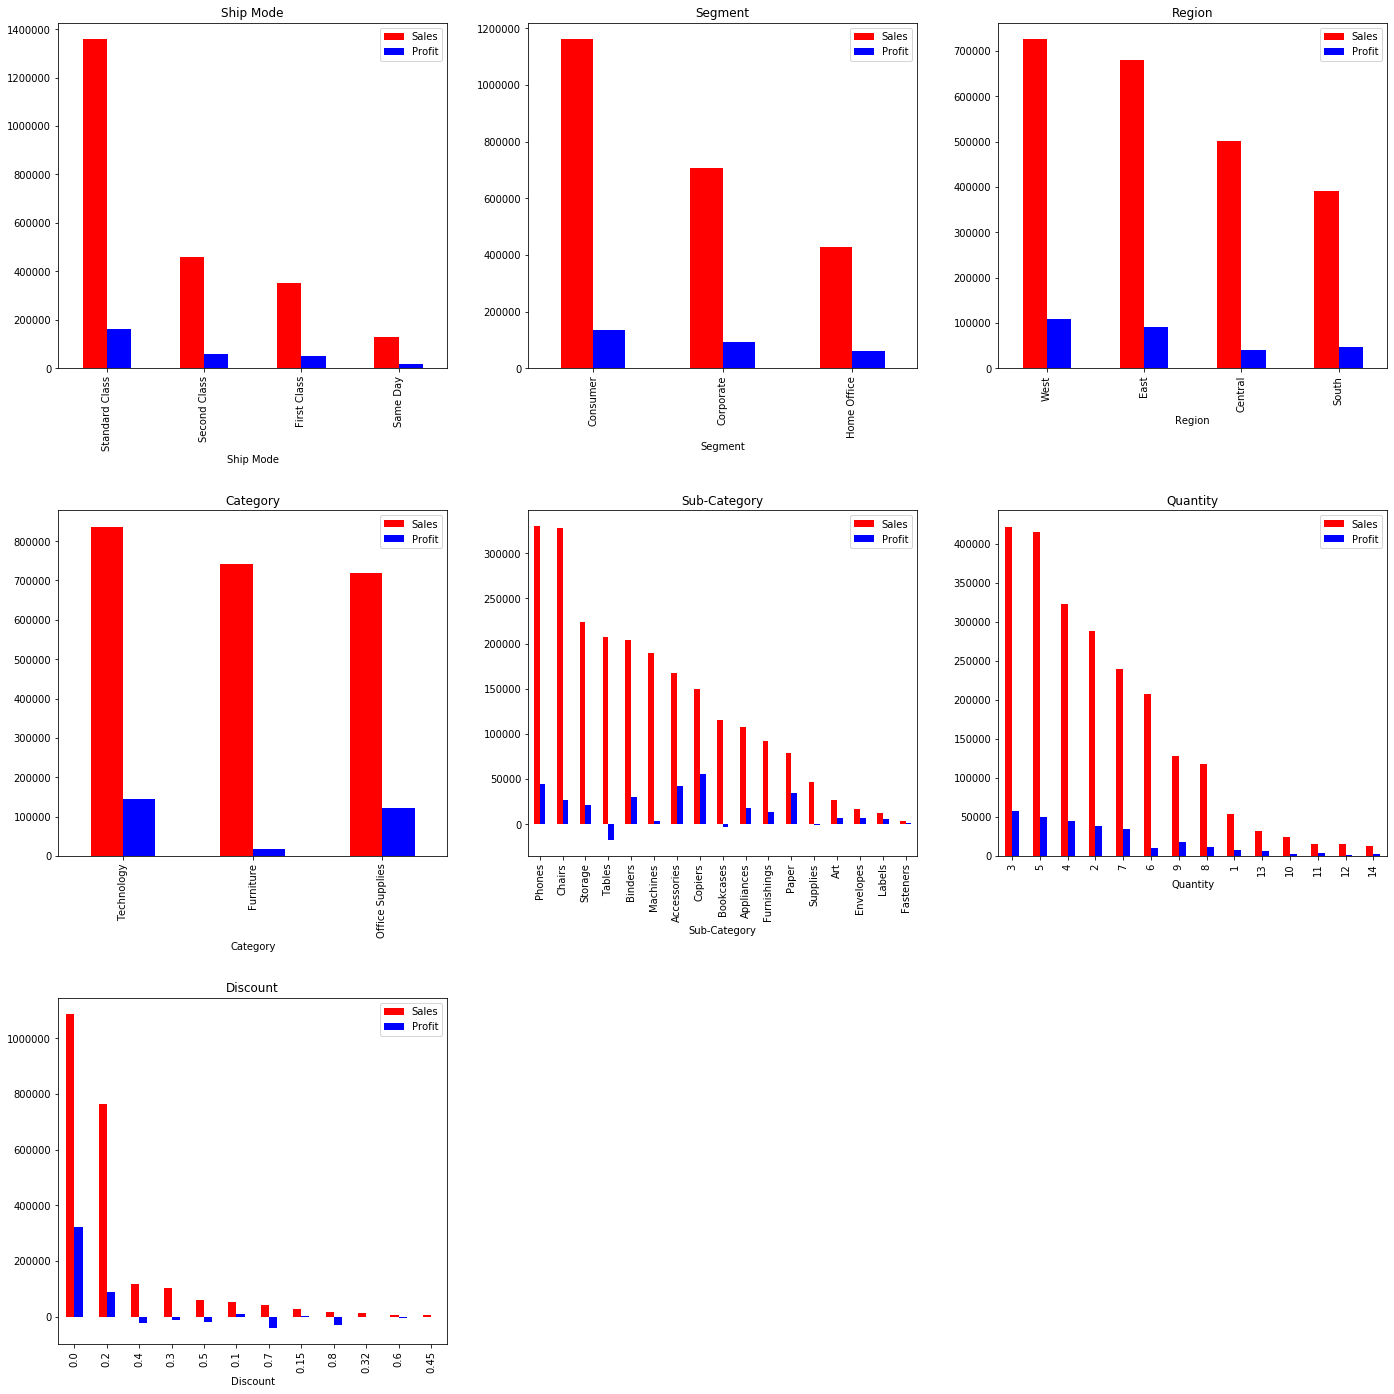

In [21]:
num_categories = 20
target_variable = ["Sales","Profit"]
sort_by = "Sales"
color = ["red", "blue"]
getUnique(data, target_variable, sort_by, color, num_categories)

* For the first exploration, Profit is compared to Sales.
* The profit for Copiers is very high.

### Exploration 2 

In [22]:
data.State.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

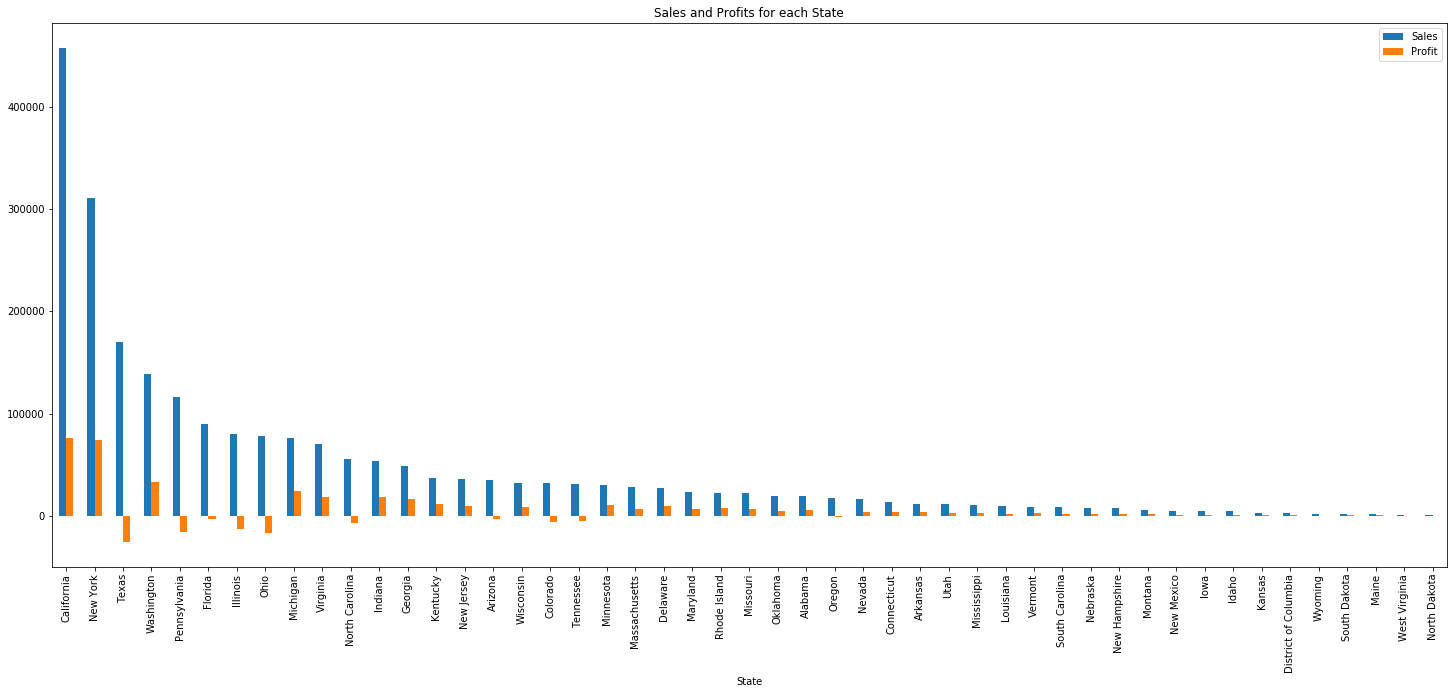

In [24]:
plt.rcParams["figure.figsize"] = [25,10]
data.groupby("State")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar")
plt.title("Sales and Profits for each State")
plt.show()

The states with high sales are generating less profit.

### Exploration 3

In [26]:
states_df = data.groupby("State")[["Sales","Profit","Discount"]].sum().sort_values(by = "Sales", ascending = False)
states_df

,Sales,Profit,Discount
State,,,
California,457687.6315,76381.3871,145.60
New York,310876.2710,74038.5486,62.40
Texas,170188.0458,-25729.3563,364.64
Washington,138641.2700,33402.6517,32.40
Pennsylvania,116511.9140,-15559.9603,192.90
Florida,89473.7080,-3399.3017,114.65
Illinois,80166.1010,-12607.8870,191.90
Ohio,78258.1360,-16971.3766,152.40
Michigan,76269.6140,24463.1876,1.80


From the above dataframe, it is clear that the states that are offered high discounts are generating less profits.

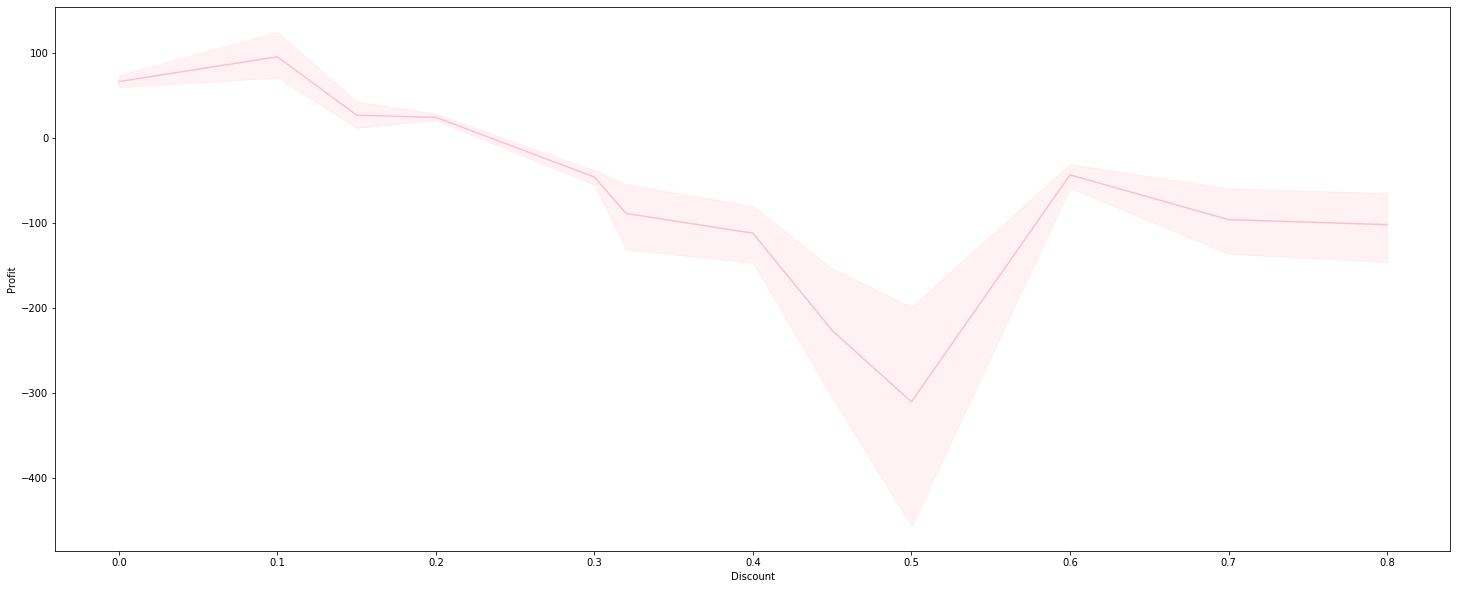

In [28]:
sns.lineplot(x = "Discount", y = "Profit", data = data, color = "pink")
plt.show()

The discount has a negative relation with Profit.

## V. Hypothesis :

### Hypothesis 1

* The profits for Tables and Bookcases sub-category are very less but the profit for Copiers is very high. So, we should focus on increasing the sales of the copiers.
* The profits for the Technology is low, but the sales of the Technology is high. So, we should focus on increasing the profit for Technology.

### Hypothesis 2

* The company is facing Loss in top 25 states with highest number of sales.
* The states with high sales are generating less profit.

### Hypothesis 3 

* The discount has a negative relation with Profit i.e. as the discount is increasing the Profit generated is decreased.

## VI. Data Summary :

From the above Data Visualization, we can see that in which states and in which category, the Sales and profits are High or low. We can improve in that States By Providing Discounts in prefered Range so that both the company and consumer will get benefit. So for deciding that range we have to do some Technical Analysis.